In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
Date = pd.read_csv('Cleaned_GenZ_DatingApp_Data.csv')

QUESTIONS FOR STUDENTS

1. Does Gender influence dating app preferences ?
   In my opinion, I think it does, a gender may pick a particular dating app based on multiple factors such as popularity, number of opposite gender using a particular app and the way an app is being promoted (An app can be desgned specifically for female or male)

2. Are people using multiple dating app preferences ?
    People are using multiple app preferences, its shown in "Primary_App" and "Secondary_Apps"

    

In [5]:
#Question 3 for students
#Which age group is most active on dating apps?
# We need to convert time into numerical values

Date['Daily_Usage_Time_Hours'] = Date['Daily_Usage_Time'].replace({
    '30 minutes' : 0.5, '1 hour' : 1, '1.5 hours' : 1.5, '2 hours' : 2, '3 hours' : 3
})

#Now we group ages and calculate the average usage time
Date.groupby(pd.cut(Date['Age'], [18, 22, 26, 30, 35, 40]))['Daily_Usage_Time_Hours'].mean()


C:\Users\MSI\AppData\Local\Temp\ipykernel_27604\2589207103.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Date['Daily_Usage_Time_Hours'] = Date['Daily_Usage_Time'].replace({
C:\Users\MSI\AppData\Local\Temp\ipykernel_27604\2589207103.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Date.groupby(pd.cut(Date['Age'], [18, 22, 26, 30, 35, 40]))['Daily_Usage_Time_Hours'].mean()


Age
(18, 22]    1.588843
(22, 26]    1.689055
(26, 30]         NaN
(30, 35]         NaN
(35, 40]         NaN
Name: Daily_Usage_Time_Hours, dtype: float64

The 18-22 Age group is the most active with an average daily usage time of 1.65 hours

4. Do people in urban vs. rural areas show different usage patterns?
   We only have Urban areas in the data set, so we cannot do the comparison.
   

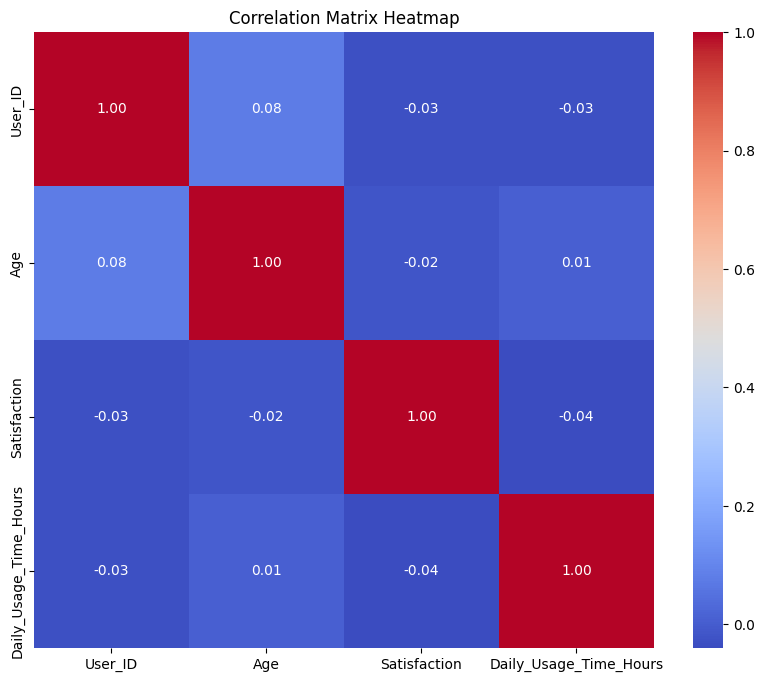

In [7]:
#Correlation Matrix & Heatmap: Identify relationships between numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = Date.select_dtypes(include='number')
correlation = numeric_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [11]:
#• Pivot Tables & Groupby Aggregations: Summarize data based on gender, age and location.

pivot_table = Date.pivot_table(
    values='Daily_Usage_Time_Hours',
    index=['Gender', 'Location'],
    columns=pd.cut(Date['Age'], bins=[18, 22, 26, 30, 35, 40]),
    aggfunc='mean',
    observed = False
)

In [12]:
pivot_table

Age                   (18, 22]  (22, 26]
Gender     Location                     
Female     Bangalore  1.611111  2.200000
           Chennai    1.281250  1.500000
           Delhi      1.888889  1.684211
           Hyderabad  2.000000  1.833333
           Kolkata    1.500000  2.100000
           Mumbai     1.730769  1.500000
           Pune       1.633333  1.681818
Male       Bangalore  1.558824  1.583333
           Chennai    1.388889  1.500000
           Delhi      1.611111  1.583333
           Hyderabad  1.700000  1.833333
           Kolkata    1.423077  1.909091
           Mumbai     1.750000  1.642857
           Pune       1.666667  1.666667
Non-binary Bangalore  1.550000  1.200000
           Chennai    1.821429  1.500000
           Delhi      1.285714  2.000000
           Hyderabad  1.666667  2.055556
           Kolkata    1.178571  1.166667
           Mumbai     1.727273  1.416667
           Pune       1.555556  1.812500

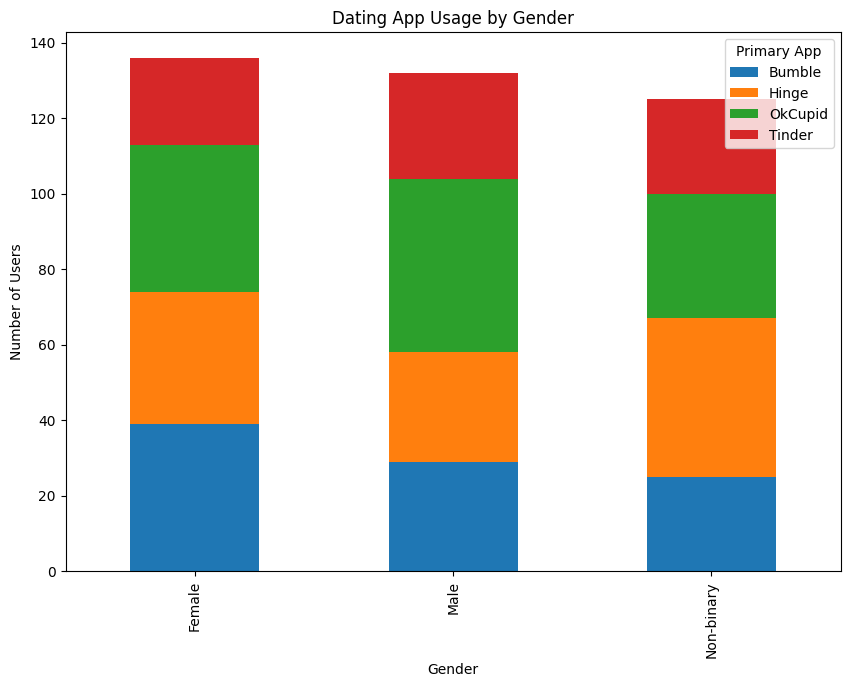

In [13]:
#Stacked Bar Charts: Visualize categorical comparisons (e.g., dating app usage by gender).

stackbar = Date.groupby(['Gender', 'Primary_App']).size().unstack().fillna(0)

stackbar.plot(kind='bar', stacked= True, figsize=(10, 7))
plt.title('Dating App Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.legend(title='Primary App')
plt.show()
